## Informasi Data Diri

Nama: Dinar Wahyu Rahman

No. Telp: 083806242160

Email: dinarrahman30@gmail.com

LinkedIn: <a href="https://www.linkedin.com/in/dinar-wahyu-rahman-00a405162/">Dinar Wahyu Rahman</a>

Alamat: Kota Jakarta Barat, DKI Jakarta

### membuat model prediktif menggunakan regresi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname, _, filenames in os.walk('D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist'): #membuka file
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Case Study - Customer.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Case Study - Legend.txt
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Case Study - Product.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Case Study - Store.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Case Study - Transaction.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Customers.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Produk.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Store.csv
D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist\Transaksi.csv


In [3]:
customer_df = pd.read_csv('D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist/Case Study - Customer.csv', sep=';')
product_df = pd.read_csv('D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist/Case Study - Product.csv', sep=';')
store_df = pd.read_csv('D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist/Case Study - Store.csv', sep=';')
transaction_df = pd.read_csv('D:/Case Study Data Scientist-20230712T153055Z-001/Case Study Data Scientist/Case Study - Transaction.csv', sep=';')

In [4]:
customer_df.sample(3)

,CustomerID,Age,Gender,Marital Status,Income
183,184,33,0,Single,"13,93"
163,164,18,1,Single,0
406,407,53,1,Married,"9,27"


In [5]:
product_df.sample()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800


In [6]:
store_df.sample()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"


In [7]:
transaction_df.sample()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
4633,TR80312,299,02/12/2022,P7,9400,5,47000,9


#### find missing value

In [8]:
customer_df.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [9]:
product_df.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

store_df.isna().sum()

In [10]:
transaction_df.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [11]:
customer_df['Marital Status'] = customer_df['Marital Status'].fillna('Unknown')

In [12]:
customer_df.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

#### change data type

In [13]:
transaction_df['Date'] = pd.to_datetime(transaction_df['Date'], format='%d/%m/%Y')

#### merge data

In [14]:
#Merging all data frame on transaction
df = pd.merge(transaction_df, customer_df, on='CustomerID', how='inner')
df = pd.merge(df, product_df, on='ProductID', how='inner')
df = pd.merge(df, store_df, on='StoreID')
df.sample(3)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
381,TR3414,56,2022-01-19,P3,7500,2,15000,13,20,1,Single,1,Crackers,7500,Buana,Buana,General Trade,"-1,26916","116,825264"
2944,TR13728,27,2022-02-26,P8,16000,3,48000,14,43,0,Married,"17,42",Oat,16000,Priangan,Priangan,Modern Trade,"-5,45","105,26667"
1709,TR43237,20,2022-12-05,P10,15000,1,15000,7,43,0,Married,"18,91",Cheese Stick,15000,Buana Indah,Buana,General Trade,"3,316694","114,590111"


In [15]:
df.rename(columns={'Price_x' : 'Price'}, inplace=True)

In [16]:
df.drop(['Latitude','Longitude', 'Price_y'],axis=1,inplace=True)
df.sample()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type
62,TR82034,372,2022-03-20,P8,16000,2,32000,12,31,1,Married,"6,19",Oat,Prestasi Utama,Prestasi,General Trade


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   object        
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [18]:
df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,Single,"7,5",Potato Chip,Gita Ginara,Gita,General Trade
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,"7,22",Potato Chip,Gita Ginara,Gita,General Trade
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,"28,23",Potato Chip,Gita Ginara,Gita,General Trade
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,"5,4",Potato Chip,Gita Ginara,Gita,General Trade


### membuat model regresi

memprediksi total qty harian dari product yang terjual.

In [19]:
!pip install pmdarima

In [20]:
from sklearn.impute import KNNImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from itertools import permutations
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#### forecasting data

In [21]:
#Forecast data
df_fore = df[['Date','Qty']]
df_fore= df_fore.groupby('Date')[['Qty']].sum()
df_fore.head(3)

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63


In [22]:
#decompose = seasonal_decompose(df_fore)

#fig,ax = plt.subplots(3,1,figsize=(15,12))
#decompose.trend.plot(ax=ax[0])
#ax[0].set_title('Trend')
#decompose.seasonal.plot(ax=ax[1])
#ax[1].set_title('Seasonal')
#decompose.resid.plot(ax=ax[2])
#ax[2].set_title('Residual')

#plt.tight_layout()
#plt.show()

In [23]:
#df_fore.plot()
#plt.show()

#### transform data

In [24]:
#Transform data to log
df_fore = np.log(df_fore)
df_fore.head(3)

,Qty
Date,
2022-01-01,3.891820
2022-01-02,4.077537
2022-01-03,4.143135


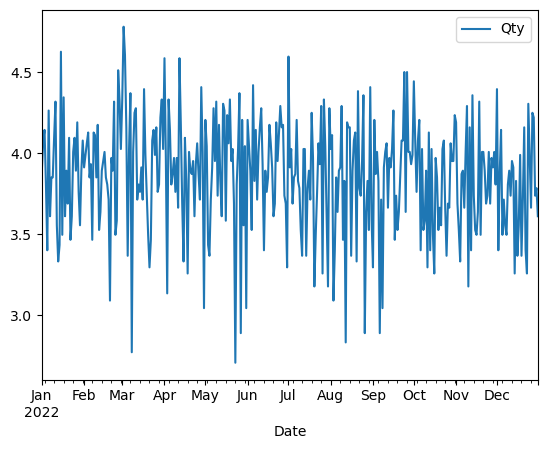

In [25]:
df_fore.plot()
plt.show()

In [26]:
#Split train and test
df_train = df_fore.iloc[:-31]
df_test = df_fore.iloc[-31:]

#### cek data stationary

In [27]:
#ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


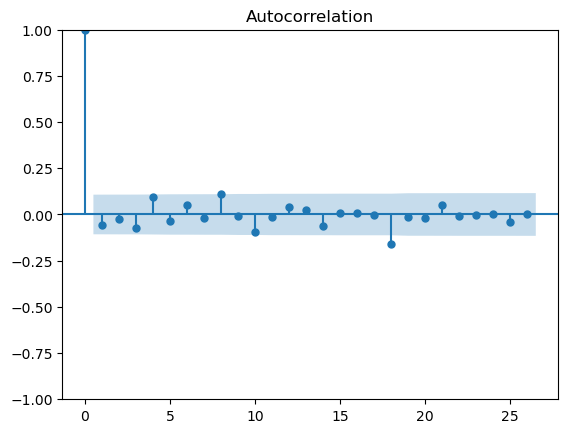

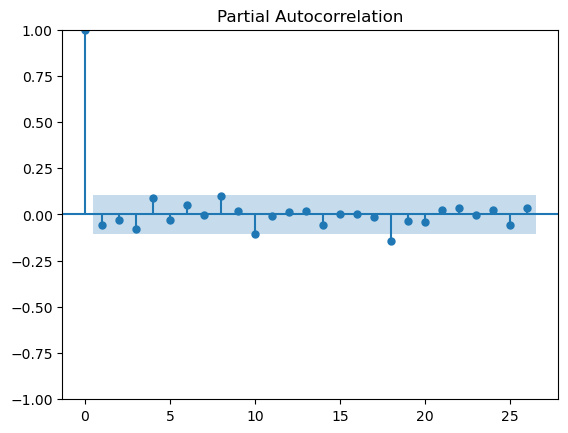

In [28]:
#ACF and PACF plot
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [29]:
#ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


### regresion with model ARIMA

dengan metode autofit ARIMA

In [30]:
#auto-fit ARIMA
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [31]:
#Manual parameter tuning
model = ARIMA(df_train, order=(70, 2, 1))
model_fit = model.fit()

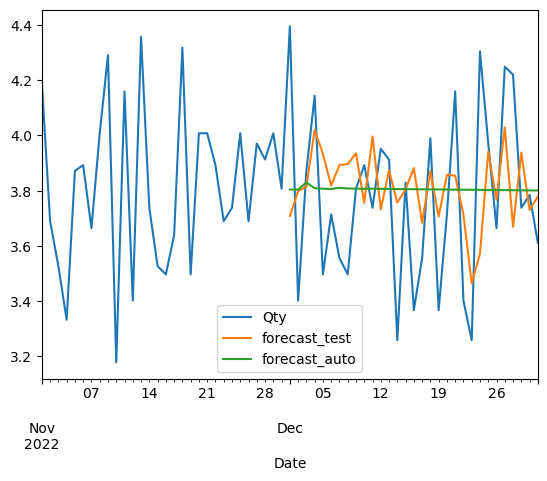

In [33]:
#plot forecasting
forecast_test = model_fit.forecast(len(df_test))
forecast_auto = auto_arima.predict(len(df_test))

df_plot = df_fore[['Qty']].iloc[-61:]

df_plot['forecast_test'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)

df_plot.plot()
plt.show()

In [34]:
#Auto-fit ARIMA metrics

mae = mean_absolute_error(df_test, forecast_auto)
mape = mean_absolute_percentage_error(df_test, forecast_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_auto))

print(f'mae - auto: {round(mae,4)}')
print(f'mape - auto: {round(mape,4)}')
print(f'rmse - auto: {round(rmse,4)}')

mae - auto: 0.2567
mape - auto: 0.0691
rmse - auto: 0.3121


#### forecasting overall qty

In [35]:
#Apply model to forecast data
model = ARIMA(df_fore, order=(70, 2, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

In [36]:
#Re-trasnform data
df_fore = np.exp(df_fore)
forecast = np.exp(forecast)

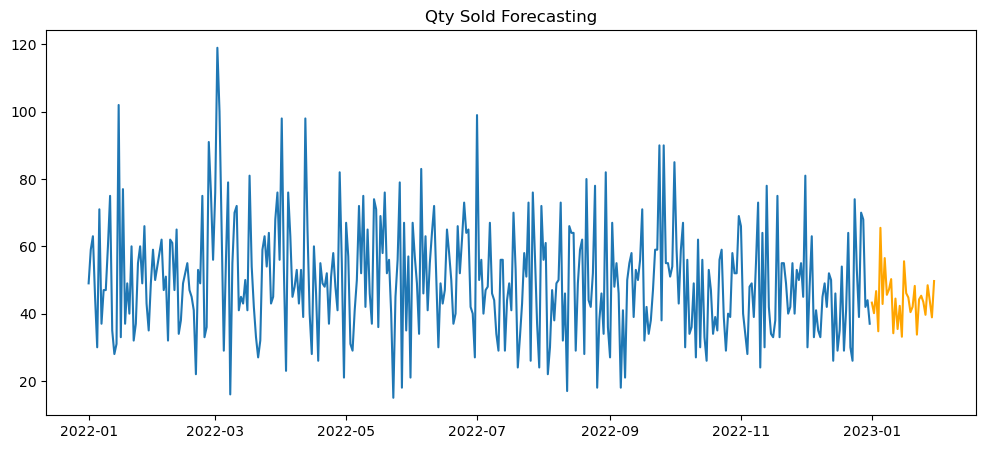

In [37]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_fore)
plt.plot(forecast,color='orange')
plt.title('Qty Sold Forecasting')
plt.show()

In [38]:
forecast.mean()

44.22847832496096

Dapat disimpulkan bahwa untuk qty penjualan bulan depan adalah sekitar rata-rata 44 pcs per harinya.

#### forecasting each product

In [39]:
#Forecast for next 30 days for each product
list_prod = df['Product Name'].unique()

dfp = pd.DataFrame({'Date':pd.date_range(start='2023-01-01',end='2023-01-30')})
dfp = dfp.set_index('Date')
for i in list_prod:
    df_ = df[['Date','Product Name','Qty']]
    df_ = df_[df_['Product Name']==i]
    df_= df_.groupby('Date')[['Qty']].sum()
    df_ = df_.reset_index()

    df_t = pd.DataFrame({'Date':pd.date_range(start='2022-01-01',end='2022-12-31')})
    df_t = df_t.merge(df_,how='left',on='Date')
    df_t = df_t.fillna(0)
    df_t = df_t.set_index('Date')

    model1 = ARIMA(df_t, order=(70, 2, 1))
    model_fit1 = model1.fit()
    forecast1 = model_fit1.forecast(steps=30)
    dfp[i] = forecast1.values
    
dfp.head()

,Crackers,Oat,Thai Tea,Choco Bar,Coffee Candy,Yoghurt,Ginger Candy,Cheese Stick,Cashew,Potato Chip
Date,,,,,,,,,,
2023-01-01,4.112360,2.555805,5.297578,2.576021,7.703349,8.575037,3.801676,4.545399,0.537687,4.994822
2023-01-02,5.027985,3.219312,4.619911,1.936513,5.586871,4.572486,7.357954,4.109316,1.189161,9.310973
2023-01-03,6.378763,1.408764,7.131472,8.862456,5.994827,6.646101,5.812374,4.112327,3.601597,7.279687
2023-01-04,4.003914,1.640130,7.036087,0.165742,5.258980,4.876523,9.285307,3.449854,4.039669,3.110060
2023-01-05,3.693320,3.079285,8.194871,4.770137,7.112995,5.145792,7.041412,8.213209,1.427126,1.504293


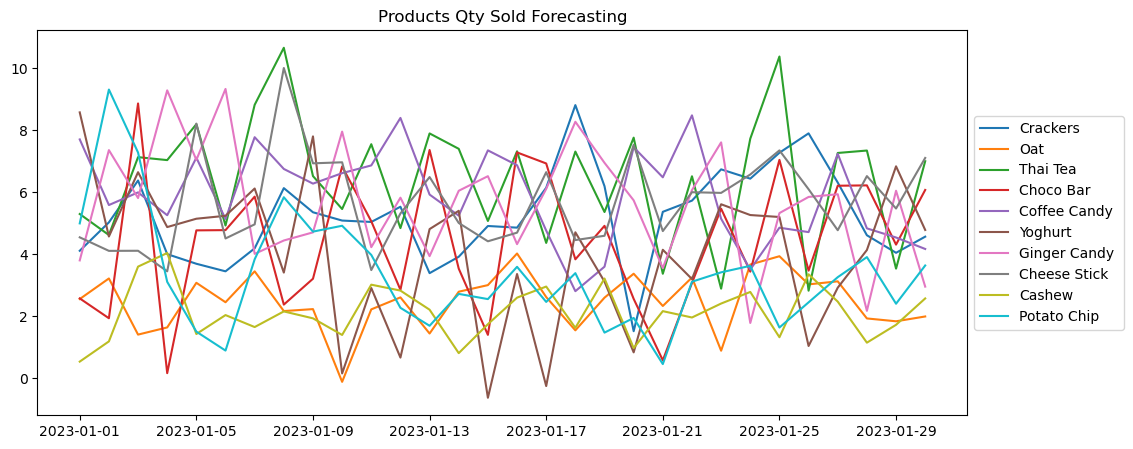

In [40]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(dfp)
plt.legend(dfp.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Products Qty Sold Forecasting')
plt.show()

In [41]:
#Products Quantity forecast
round(dfp.describe().T['mean'],0)

Crackers         5.0
Oat              2.0
Thai Tea         6.0
Choco Bar        4.0
Coffee Candy     6.0
Yoghurt          4.0
Ginger Candy     6.0
Cheese Stick     6.0
Cashew           2.0
Potato Chip      3.0
Name: mean, dtype: float64

### melakukan clustering

Tujuan dari pembuatan model machine learning ini adalah untuk dapat membuat cluster customer-customer yang mirip.

In [43]:
df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,Single,"7,5",Potato Chip,Gita Ginara,Gita,General Trade
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,"7,22",Potato Chip,Gita Ginara,Gita,General Trade
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,"28,23",Potato Chip,Gita Ginara,Gita,General Trade
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,"5,4",Potato Chip,Gita Ginara,Gita,General Trade


In [44]:
df_clust = df.groupby('CustomerID').agg({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'})
df_clust

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


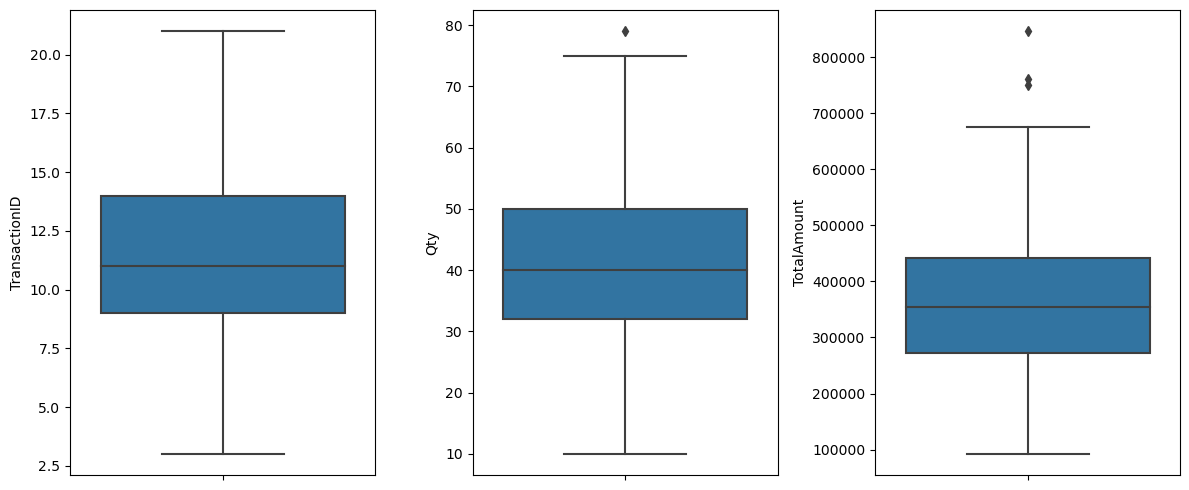

In [45]:
#Check outliers on new dataset
features = df_clust.columns
fig, ax = plt.subplots(1,len(df_clust.columns),figsize=(12,5))
for i in range(0,len(df_clust.columns)):
    sns.boxplot(data=df_clust,y=features[i],ax=ax[i])
plt.tight_layout()
plt.show()

In [46]:
#Standarisasi dataset baru
X = df_clust.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df_clust.columns)
df_std.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

#### clustering with Kmeans

In [47]:
# Kmeans n_cluster = 3
#Clustering Kmeans
kmeans_3 = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans_3.fit(X_std)

#Tambah clusters label pada dataset
df_cl3 = pd.DataFrame(data=X_std,columns=df_clust.columns)
df_cl3['cluster'] = kmeans_3.labels_
df_cl3.sample(3)

,TransactionID,Qty,TotalAmount,cluster
14,0.237401,0.240877,0.355739,2
35,-0.379565,-0.700861,-0.402525,2
134,0.854367,0.162399,0.207942,2


<Figure size 400x400 with 0 Axes>

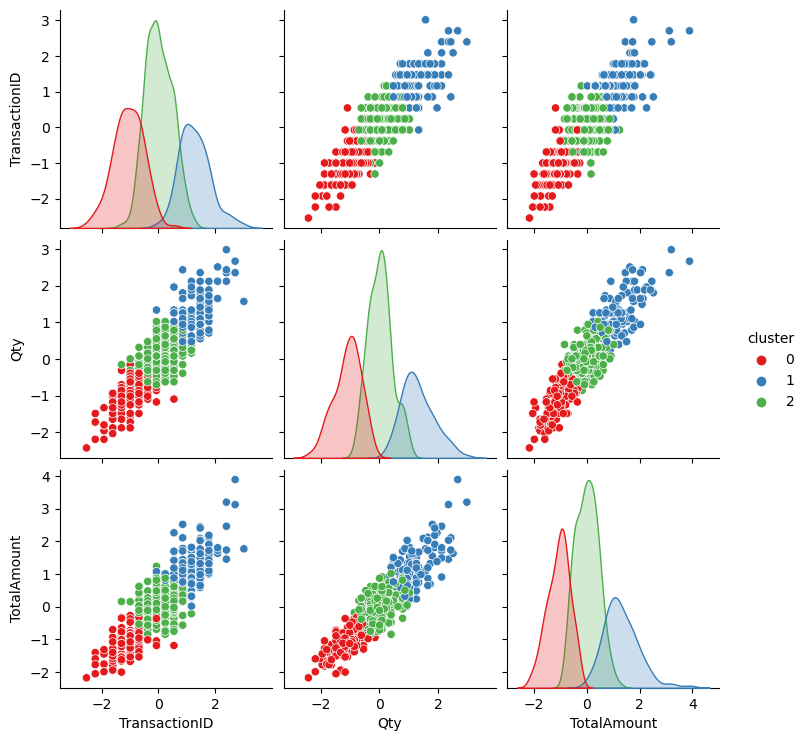

In [48]:
#PLot Before PCA
plt.figure(figsize=(4,4))
sns.pairplot(data=df_cl3,hue='cluster',palette='Set1')
plt.show()

In [49]:
#PCA
pcs_3 = PCA(n_components=2).fit_transform(X_std)
pdf_3 = pd.DataFrame(data=pcs_3,columns=['pc1','pc2'])
pdf_3['cluster'] = df_cl3['cluster']
pdf_3.describe().T

,count,mean,std,min,25%,50%,75%,max
pc1,447.0,0.000000e+00,1.661646,-4.120551,-1.132975,-0.123870,1.081022,5.351262
pc2,447.0,-1.986976e-17,0.386276,-1.279946,-0.242372,-0.003848,0.246496,1.348982
cluster,447.0,1.149888e+00,0.856206,0.000000,0.000000,1.000000,2.000000,2.000000


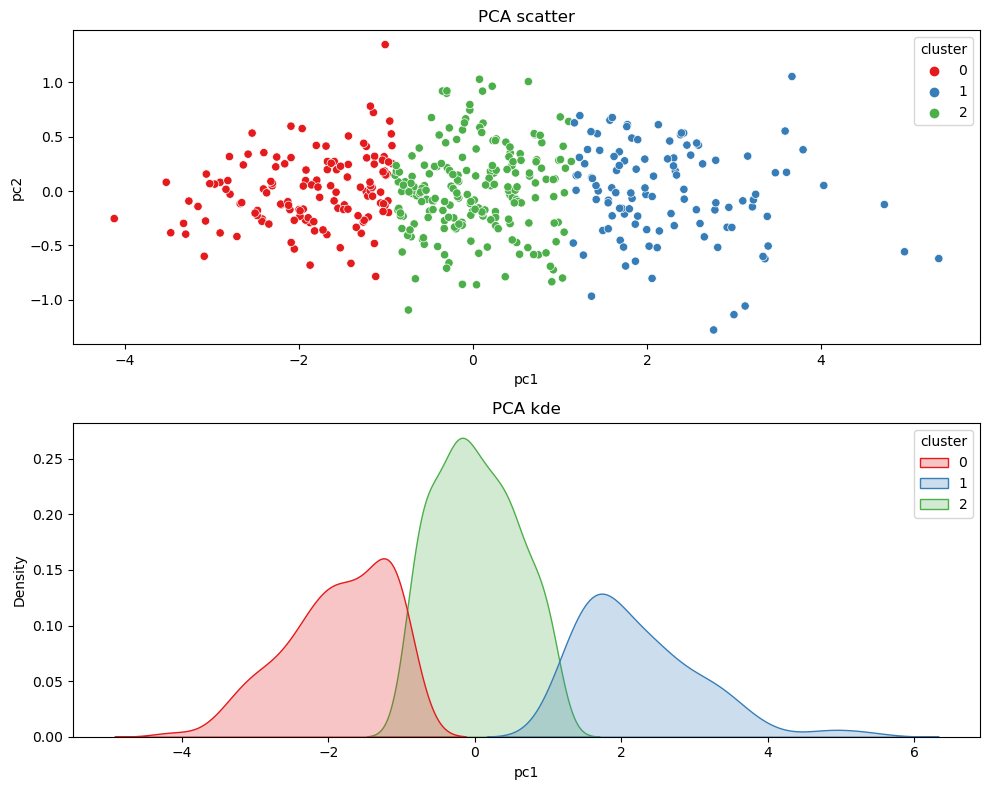

In [50]:
#PCA plot
fig,ax = plt.subplots(2,1,figsize=(10,8))
# plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf_3,x='pc1',y='pc2',hue='cluster',palette='Set1',ax=ax[0])
ax[0].set_title('PCA scatter')
sns.kdeplot(data=pdf_3,x='pc1',hue='cluster',palette='Set1',fill=True,ax=ax[1])
ax[1].set_title('PCA kde')
plt.tight_layout()
plt.show()

#### Sillhouette analysis

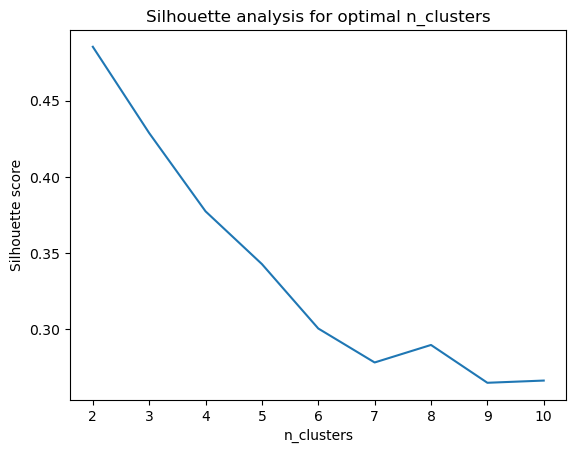

In [51]:
n_clust = list(range(2,11))
silhouette_avg = []
for i in n_clust:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    
    labels = kmeans.fit_predict(X_std)
    silhouette_avg.append(silhouette_score(X_std,labels))
    
plt.plot(n_clust,silhouette_avg)
plt.xlabel('n_clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal n_clusters')
plt.show()

#### Cluster Analysis

In [57]:
df_clust['cluster'] = kmeans_3.labels_

df['recency'] = (pd.to_datetime('2023-01-01') - df_['Date']).dt.days.astype('int')
df_r = df.groupby('CustomerID').agg({'recency':'min'})

df_rfm = df_clust.copy()
df_rfm['recency'] = df_r['recency']

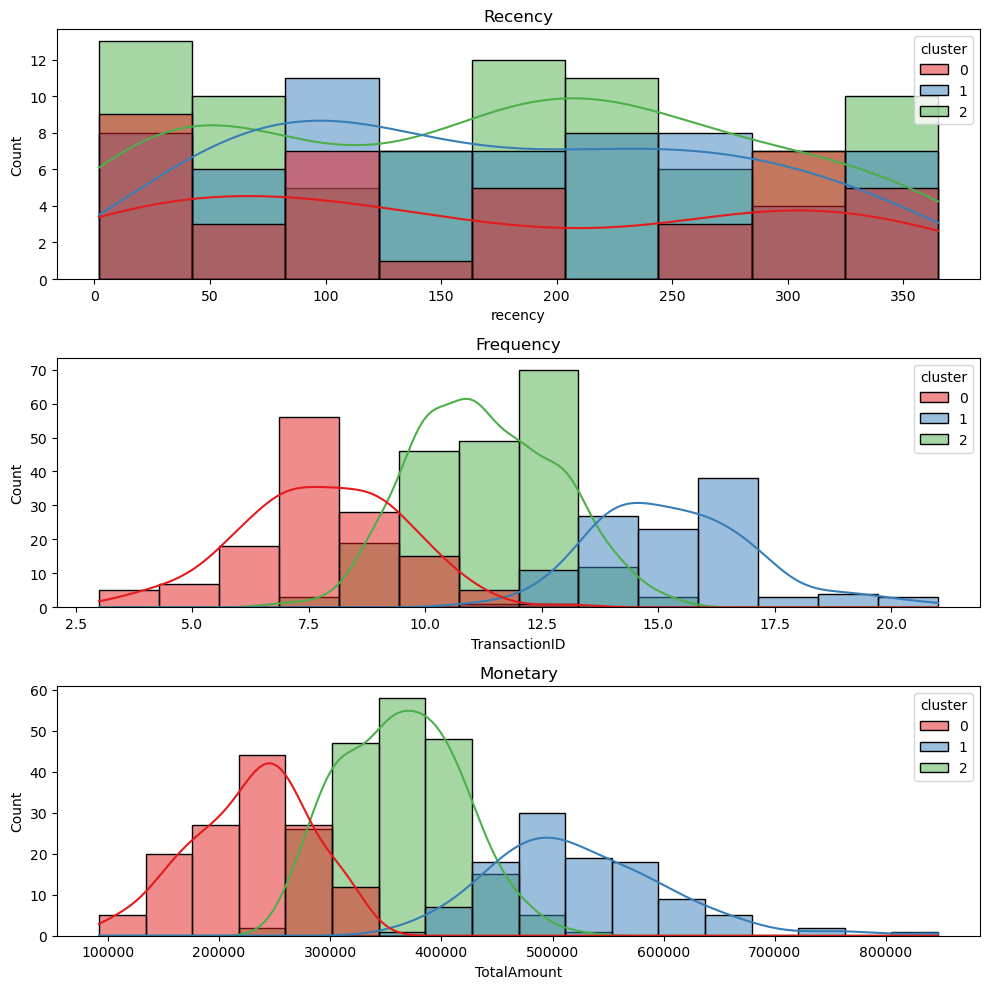

In [59]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.histplot(data=df_rfm,x='recency',hue='cluster',palette='Set1',ax=ax[0],kde=True)
ax[0].set_title('Recency')
sns.histplot(data=df_rfm,x='TransactionID',hue='cluster',palette='Set1',ax=ax[1],kde=True)
ax[1].set_title('Frequency')
sns.histplot(data=df_rfm,x='TotalAmount',hue='cluster',palette='Set1',ax=ax[2],kde=True)
ax[2].set_title('Monetary')

plt.tight_layout()
plt.show()

### Summary


0 = New Customer

strategy -> because it is a new customer, the right company strategy is to provide attractive offers that can increase loyalty in the form of:
* gift discounts
* good customer support, and 
* create new customer satisfaction surveys.


1 = Potensial Customer

strategy -> because they are potential customers, the right company strategy is to need attractive offers that can convert them into loyal customers in the form of: 
* gift discounts
* provide proactive communication
* identify their needs by providing good service, and 
* carry out regular follow-ups if the potential customer has not decided to buy.


2 = Loyal Customer

strategy -> because they are loyal customers, the right company strategy is to need attractive offers that can maintain and improve good relations with them in the form of offering loyalty programs specifically for loyal customers such as:
* exclusive product offers
* gift discounts, and 
* creating special surveys for loyal customers.